#Importing_Required_Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from math import sqrt,exp

#Importing_Required_Images

In [ ]:
normalcolor = cv2.imread("/content/drive/MyDrive/ipphotos/Assignment10/normalimage.jpg")
normalgray = cv2.imread("/content/drive/MyDrive/ipphotos/Assignment10/normalimage.jpg", 0)
saltnoisecolor = cv2.imread("/content/drive/MyDrive/ipphotos/Assignment10/saltnoisecolor.png")
saltnoisegray = cv2.imread("/content/drive/MyDrive/ipphotos/Assignment10/saltnoisecolor.png", 0)
pepnoisecolor = cv2.imread("/content/drive/MyDrive/ipphotos/Assignment10/pepnoisecolor.png")
pepnoisegray = cv2.imread("/content/drive/MyDrive/ipphotos/Assignment10/pepnoisecolor.png", 0)
gusnoisecolor = cv2.imread("/content/drive/MyDrive/ipphotos/Assignment10/gusnoisecolor.png")
gusnoisegray = cv2.imread("/content/drive/MyDrive/ipphotos/Assignment10/gusnoisecolor.png", 0)

#Converting_Images_Into_Suitable_Format_For_Plot

In [ ]:
colorimglist = [normalcolor, saltnoisecolor, pepnoisecolor, gusnoisecolor]

In [ ]:
#displaying images in use in proper color format
#run_this_once
def convert(image):
  b,g,r=cv2.split(image)
  retimg =cv2.merge([r,g,b])
  return retimg


list2 = colorimglist
for i in range(0,4):
   list2[i] = convert(colorimglist[i])

[normalcolor, saltnoisecolor, pepnoisecolor, gusnoisecolor] = list2

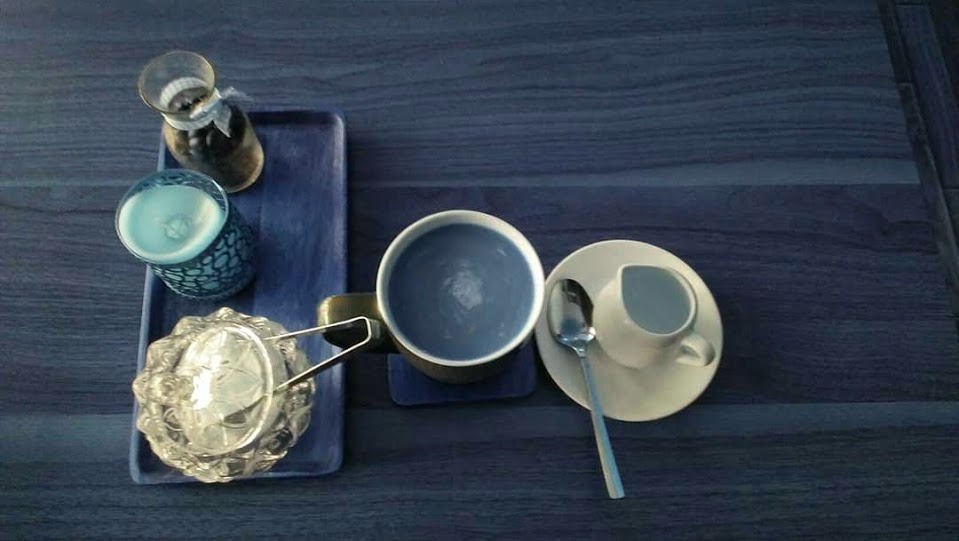

In [ ]:
cv2_imshow(normalcolor)

#Plotting_All_Input_Images

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbee2e35290>,
 Text(0.5, 1.0, 'Image with salt noise in gray'))

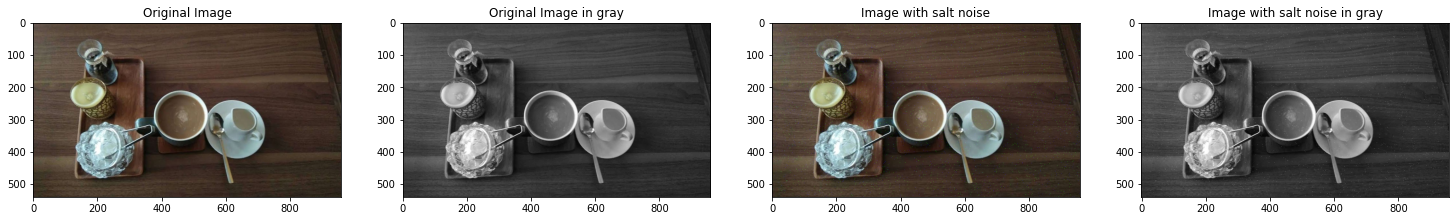

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(normalcolor), plt.title("Original Image")
plt.subplot(152), plt.imshow(normalgray, "gray"), plt.title("Original Image in gray")
plt.subplot(153), plt.imshow(saltnoisecolor), plt.title("Image with salt noise")
plt.subplot(154), plt.imshow(saltnoisegray, "gray"), plt.title("Image with salt noise in gray")

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbee282e0d0>,
 Text(0.5, 1.0, 'Image with Gaussian noise in gray'))

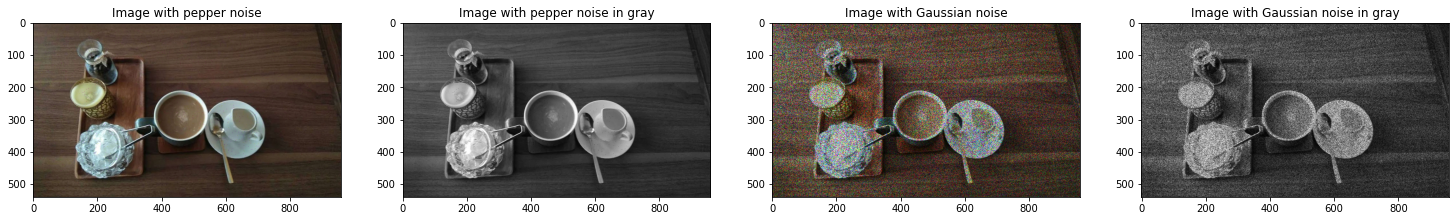

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(152), plt.imshow(pepnoisecolor), plt.title("Image with pepper noise")
plt.subplot(153), plt.imshow(pepnoisegray, "gray"), plt.title("Image with pepper noise in gray")
plt.subplot(154), plt.imshow(gusnoisecolor), plt.title("Image with Gaussian noise")
plt.subplot(155), plt.imshow(gusnoisegray, "gray"), plt.title("Image with Gaussian noise in gray")

#Plotting_Histograms_For_Gray_Images_To_Visaulize_Noises

In [ ]:
normalhist = cv2.calcHist([normalgray],[0],None,[256],[0,256])
salthist = cv2.calcHist([saltnoisegray],[0],None,[256],[0,256])
pephist = cv2.calcHist([pepnoisegray],[0],None,[256],[0,256])
gushist = cv2.calcHist([gusnoisegray],[0],None,[256],[0,256])

([<matplotlib.lines.Line2D at 0x7fbee270bc50>],
 Text(0.5, 1.0, 'Original Image'))

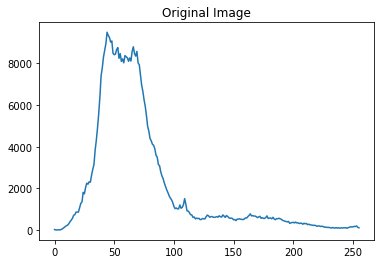

In [ ]:
plt.plot(normalhist), plt.title("Original Image")

([<matplotlib.lines.Line2D at 0x7fbee266ee90>],
 Text(0.5, 1.0, 'Image with added Salt noise'))

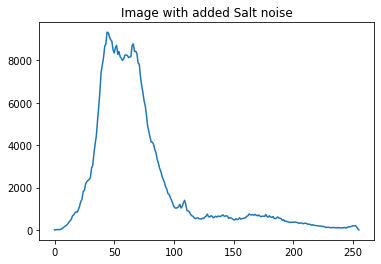

In [ ]:
plt.plot(salthist), plt.title("Image with added Salt noise")

([<matplotlib.lines.Line2D at 0x7fbee25e0110>],
 Text(0.5, 1.0, 'Image with added Pepper noise'))

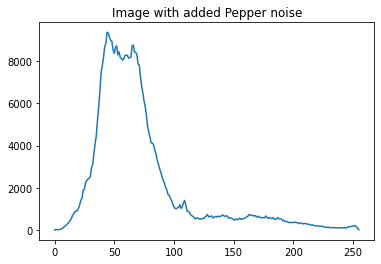

In [ ]:
plt.plot(pephist), plt.title("Image with added Pepper noise")

([<matplotlib.lines.Line2D at 0x7fbee25c8390>],
 Text(0.5, 1.0, 'Image with added Gaussian noise'))

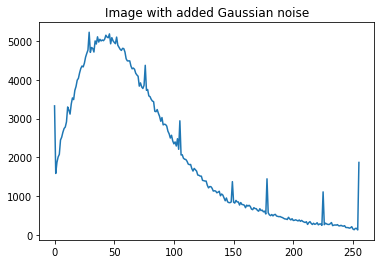

In [ ]:
plt.plot(gushist), plt.title("Image with added Gaussian noise")

([<matplotlib.lines.Line2D at 0x7fbee247f890>],
 Text(0.5, 1.0, 'Image with added Gaussian noise'))

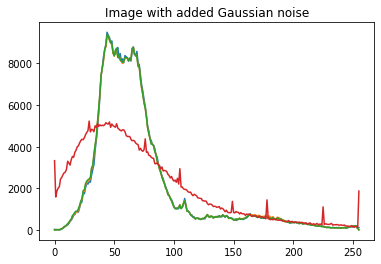

In [ ]:
#plotting all the histograms
plt.plot(normalhist), plt.title("Original Image")
plt.plot(salthist), plt.title("Image with added Salt noise")
plt.plot(pephist), plt.title("Image with added Pepper noise")
plt.plot(gushist), plt.title("Image with added Gaussian noise")

#Codes_for_adding_noise_to_img

In [ ]:
#adding_salt_noise
row,col,ch = image.shape
s_vs_p = 0.5
amount = 0.004
out = np.copy(image)

num_salt = np.ceil(amount * image.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt))
        for i in image.shape]
out[coords] = 255
#out_is_image_with_noise

In [ ]:
#adding Pepper noise
image2 = use_img
row,col,ch = image2.shape
s_vs_p = 0.5
amount = 0.004
out2 = np.copy(image2)

num_pepper = np.ceil(amount* image2.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper))
        for i in image2.shape]
out2[coords] = 0

In [ ]:
#adding_gaussian_noise
image = use_img
row,col,ch = image.shape
gauss = np.random.randn(row,col,ch)
gauss = gauss.reshape(row,col,ch)        
noisy = image + image * gauss
#noisy_is_image_with_gaussian_noise

#Visualising_gaussian_noise_in_frequency_domain

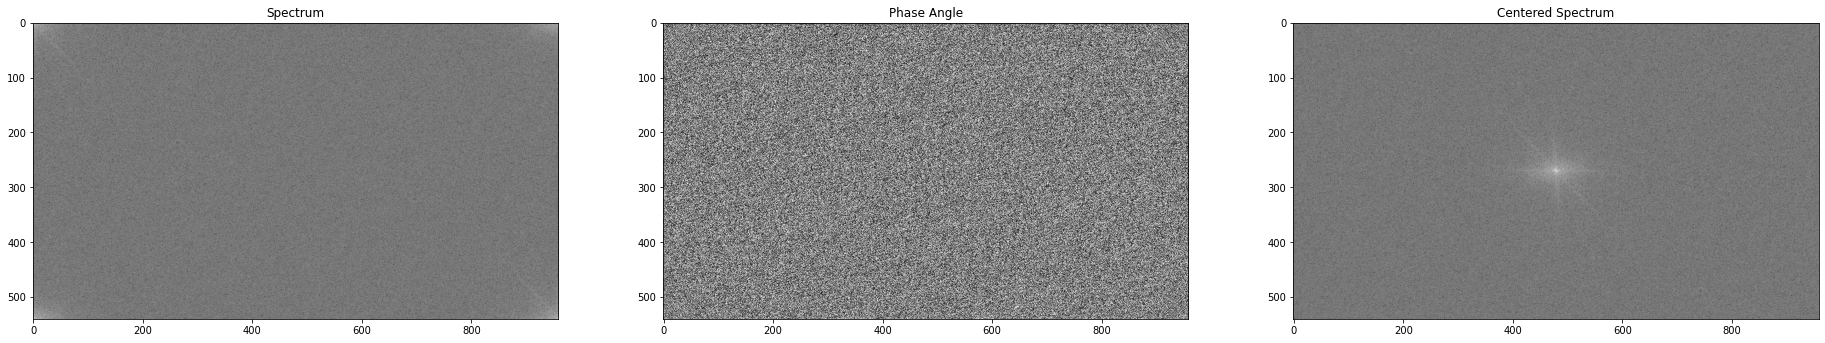

In [ ]:
gaussian_noise_img = gusnoisegray
gaussian_noise_in_fd = np.fft.fft2(gaussian_noise_img)
centered_gnifd = np.fft.fftshift(gaussian_noise_in_fd)
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(131), plt.imshow(np.log(np.abs(gaussian_noise_in_fd)), "gray"), plt.title("Spectrum")
plt.subplot(132), plt.imshow(np.angle(gaussian_noise_in_fd), "gray"), plt.title("Phase Angle")
plt.subplot(133), plt.imshow(np.log(1+np.abs(centered_gnifd)), "gray"), plt.title("Centered Spectrum")
plt.show()

#Applying_Noise_Removal_Filters

---



##Arithmetic_Mean_Filter_For_Gausssian_blur

Input Image with Gaussian Blur


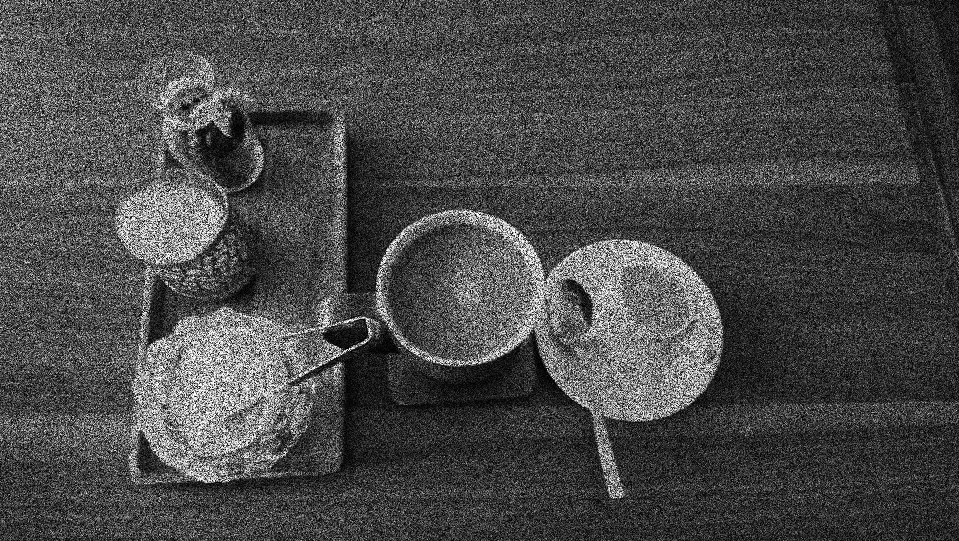

Image with Gaussian Blur after applying Mean Filter


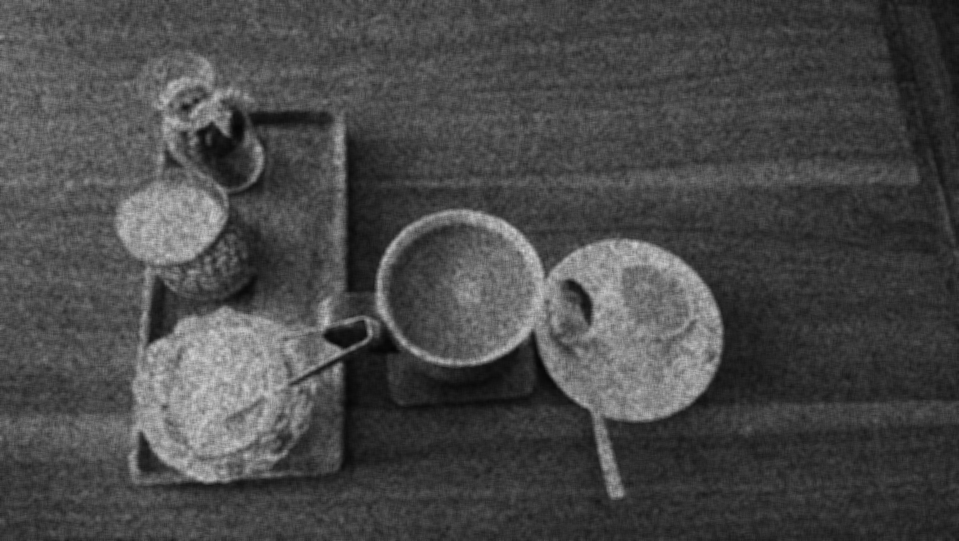

In [ ]:
#2D_convolution_using_a_kernel_and_cv2.filter2D()
#arithmetic_mean_filter
input = gusnoisegray
kernel = np.ones((5,5),np.float32)/25
output = cv2.filter2D(input,-1,kernel)

print("Input Image with Gaussian Blur")
cv2_imshow(input)
print("Image with Gaussian Blur after applying Mean Filter")
cv2_imshow(output)

In [ ]:
#plotting_histograms_to_visaulise_differences

In [ ]:
inputhist = cv2.calcHist([input],[0],None,[256],[0,256])
outputhist = cv2.calcHist([output],[0],None,[256],[0,256])

([<matplotlib.lines.Line2D at 0x7fbee155f450>],
 Text(0.5, 1.0, 'Original Image'))

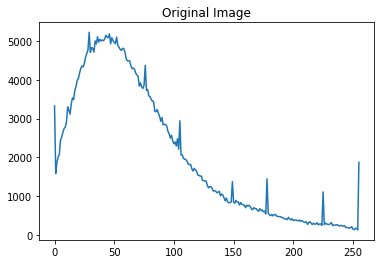

In [ ]:
plt.plot(inputhist), plt.title("Original Image")

([<matplotlib.lines.Line2D at 0x7fbee15da650>], Text(0.5, 1.0, 'Output Image'))

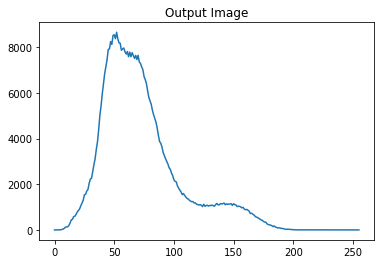

In [ ]:
plt.plot(outputhist), plt.title("Output Image")

In [ ]:
#Conclusion: Mean Arithmetic Filter Effectively Removes Noises.
#You can see in histogram plot that output looks like our normal image

##Arithmetic_Mean_Filter_For_Salt_and_Pepper_Noise

Input Image with Salt Noise


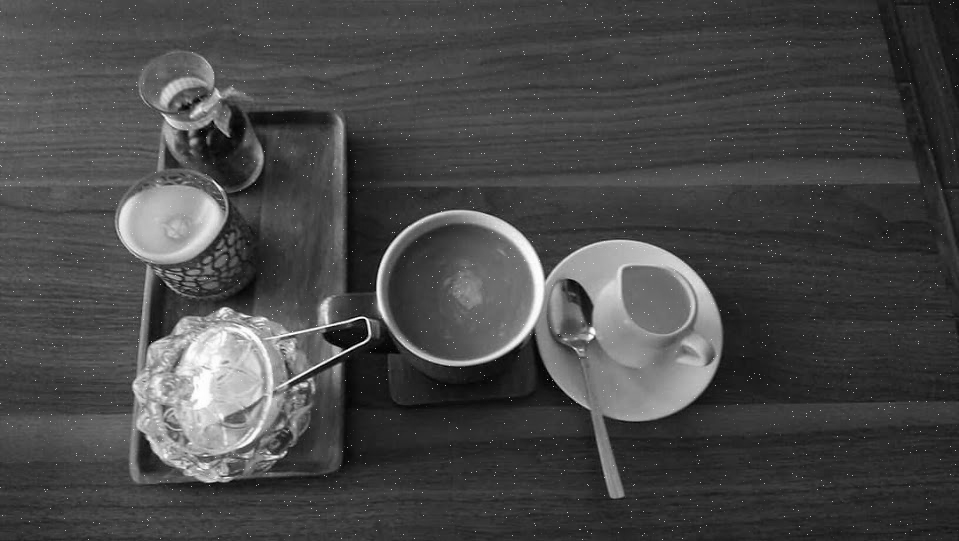

Image with Salt Noise after applying Mean Filter


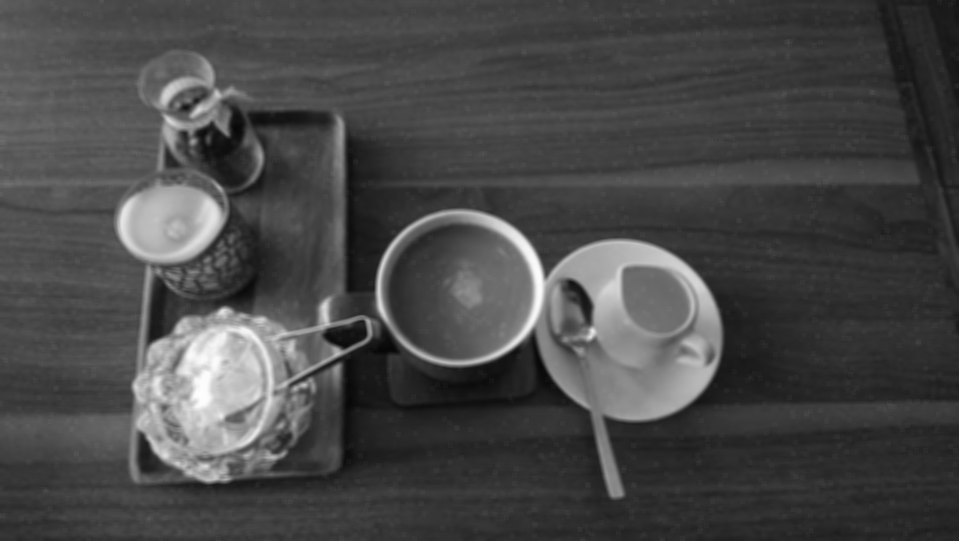

Input Image with Pepper Noise


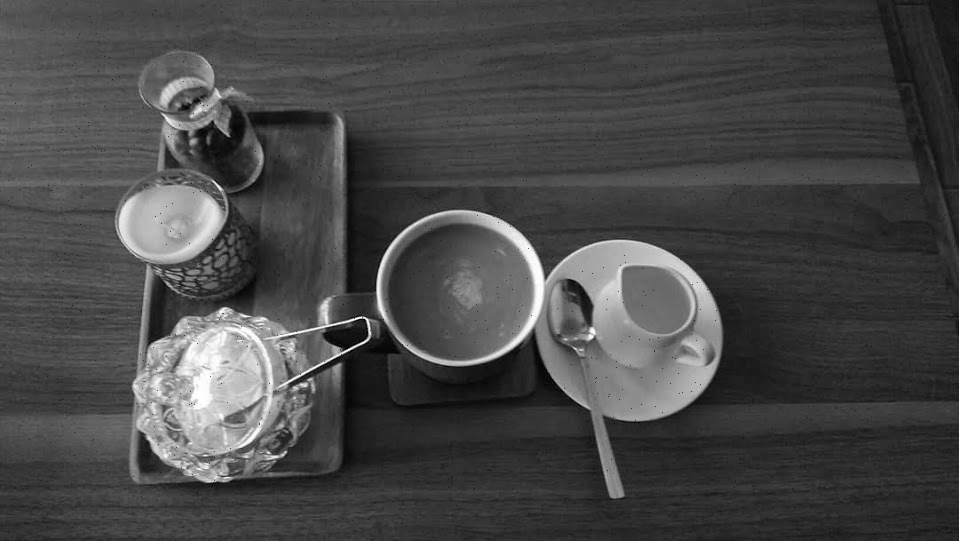

Image with Pepper Noise after applying Mean Filter


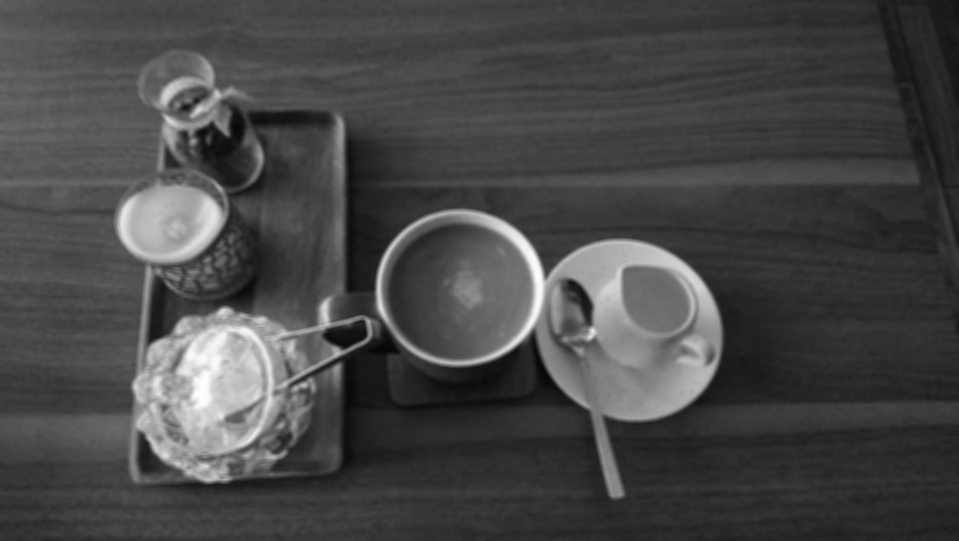

In [ ]:
#2D_convolution_using_a_kernel_and_cv2.filter2D()
#5x5_kernel_is_used_above
#arithmetic_mean_filter
input2 = saltnoisegray
input3 = pepnoisegray

output2 = cv2.filter2D(input2,-1,kernel)
output3 = cv2.filter2D(input3,-1,kernel)

print("Input Image with Salt Noise")
cv2_imshow(input2)
print("Image with Salt Noise after applying Mean Filter")
cv2_imshow(output2)
print("Input Image with Pepper Noise")
cv2_imshow(input3)
print("Image with Pepper Noise after applying Mean Filter")
cv2_imshow(output3)

##Gaussian_Filter

Input Image with Gaussian Noise


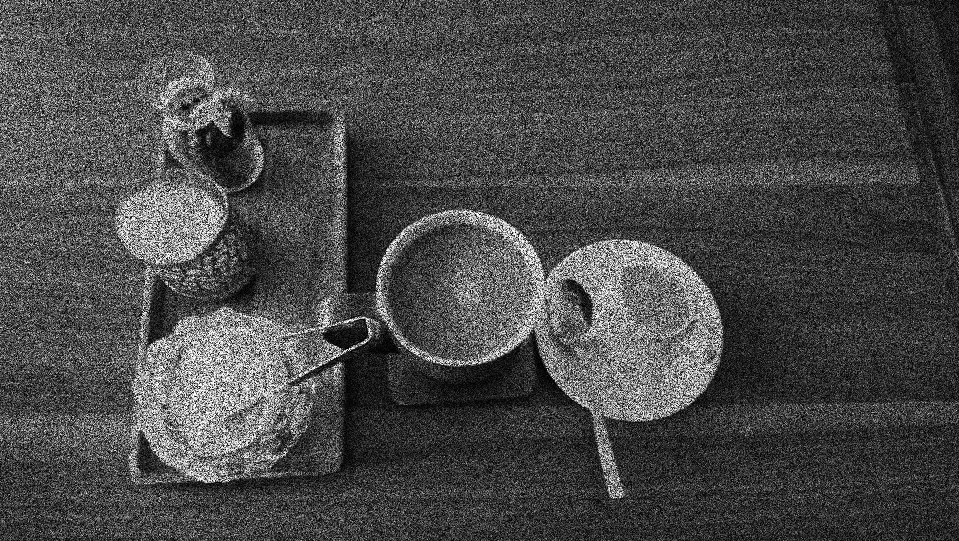

Image with Gaussian Noise after applying Gaussian Filter


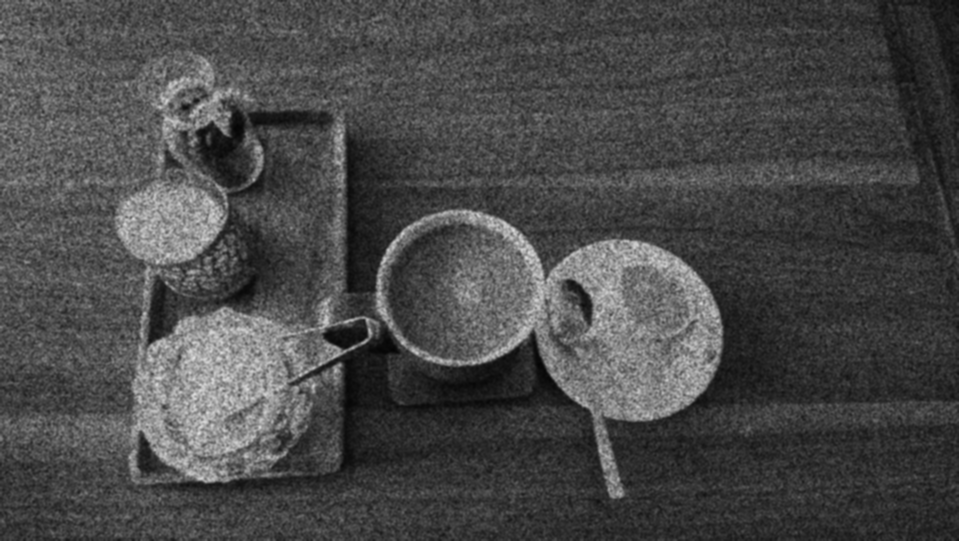

In [ ]:
output4 = cv2.GaussianBlur(input,(5,5),0)
print("Input Image with Gaussian Noise")
cv2_imshow(input)
print("Image with Gaussian Noise after applying Gaussian Filter")
cv2_imshow(output4)

([<matplotlib.lines.Line2D at 0x7fbee154ba50>],
 Text(0.5, 1.0, 'Image with Gaussian Noise after applying Gaussian Filter'))

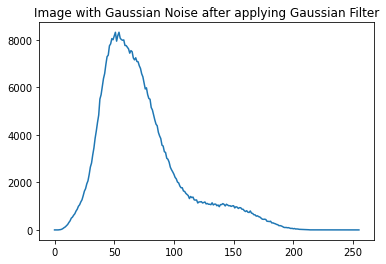

In [ ]:
outputhist2 = cv2.calcHist([output4],[0],None,[256],[0,256])
plt.plot(outputhist2), plt.title("Image with Gaussian Noise after applying Gaussian Filter")

##Contra_Harmonic_Mean_Filter_For_Gaussian_Blur

Input Image with Gaussian Noise


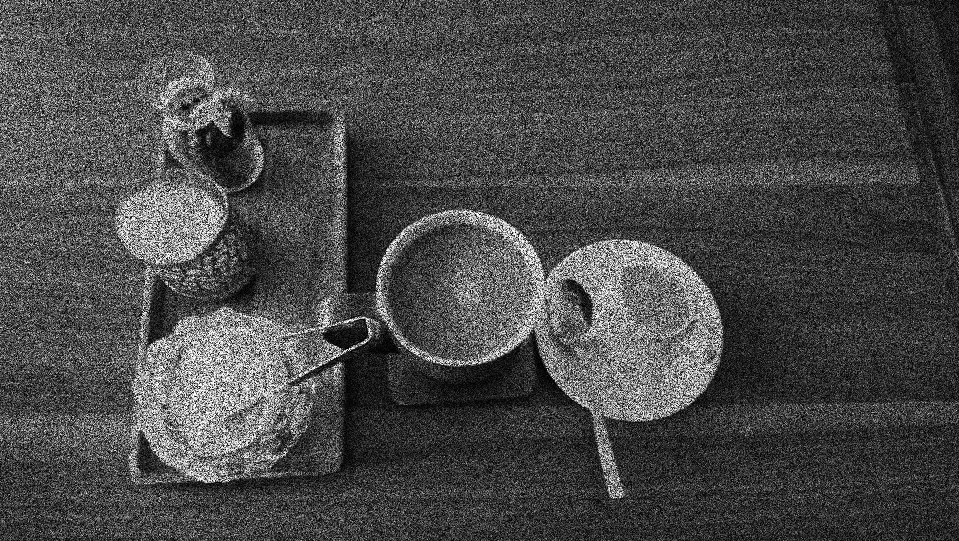

Image with Gaussian Noise after applying Contra Harmonic Mean Filter


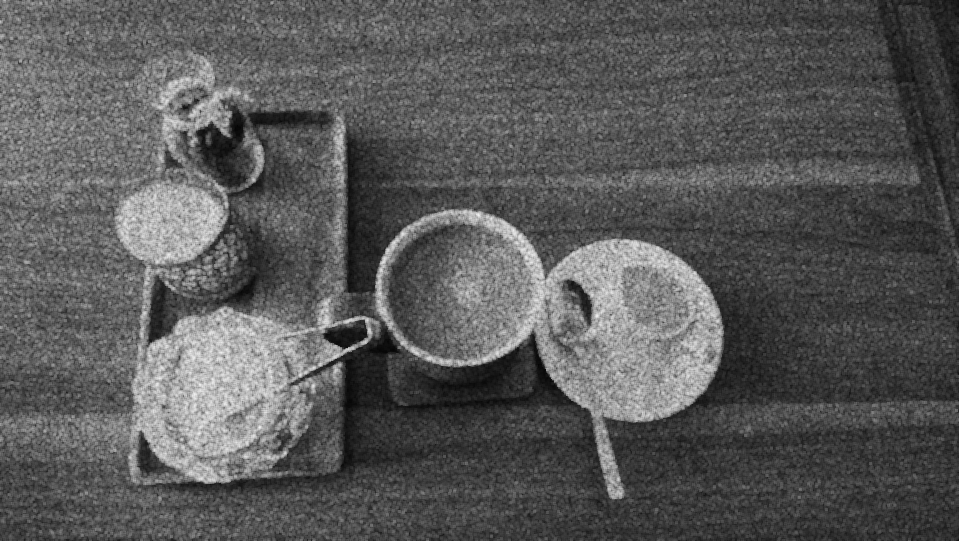

In [ ]:
def contraharmonic_mean(img, size, Q):
    num = np.power(img, Q + 1)
    denom = np.power(img, Q)
    kernel = np.full(size, 1.0)
    result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
    return result


output5 = contraharmonic_mean(input, (3,3), 0.9)
print("Input Image with Gaussian Noise")
cv2_imshow(input)
print("Image with Gaussian Noise after applying Contra Harmonic Mean Filter")
cv2_imshow(output5)
print("\n")

##Contra_Harmonic_Mean_Filter_for_Salt_and_Pepper_Noises

Input Image with Salt Noise


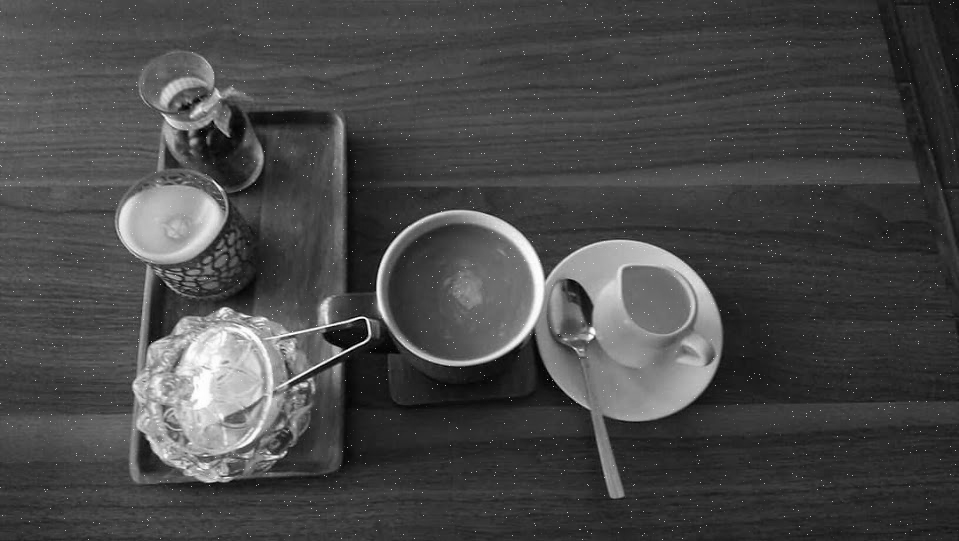

Image with Salt Noise after applying Contra Harmonic Mean Filter


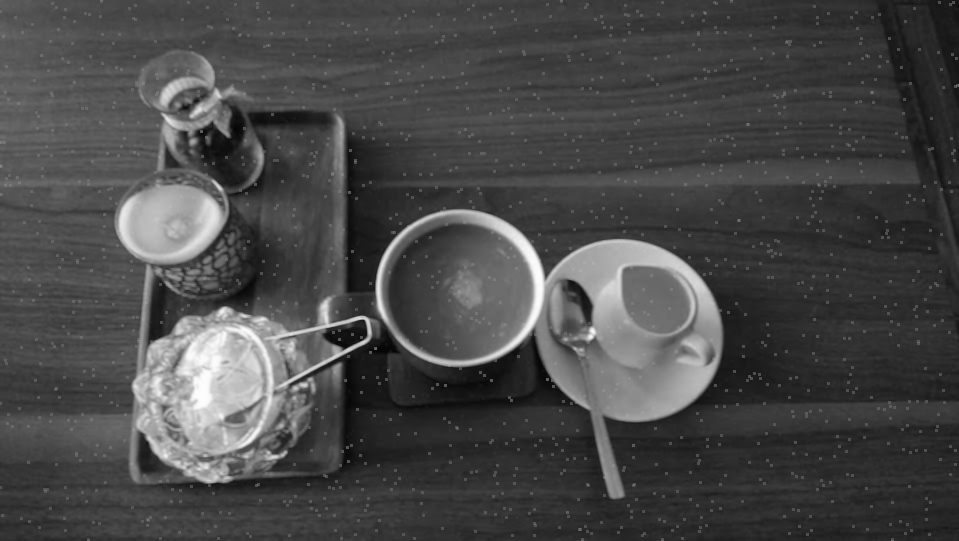

In [ ]:
output6 = contraharmonic_mean(input2, (3,3), 0.9)
print("Input Image with Salt Noise")
cv2_imshow(input2)
print("Image with Salt Noise after applying Contra Harmonic Mean Filter")
cv2_imshow(output6)
print("\n")

##Harmonic_Mean_Filter

Input Image with Gaussian Noise


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


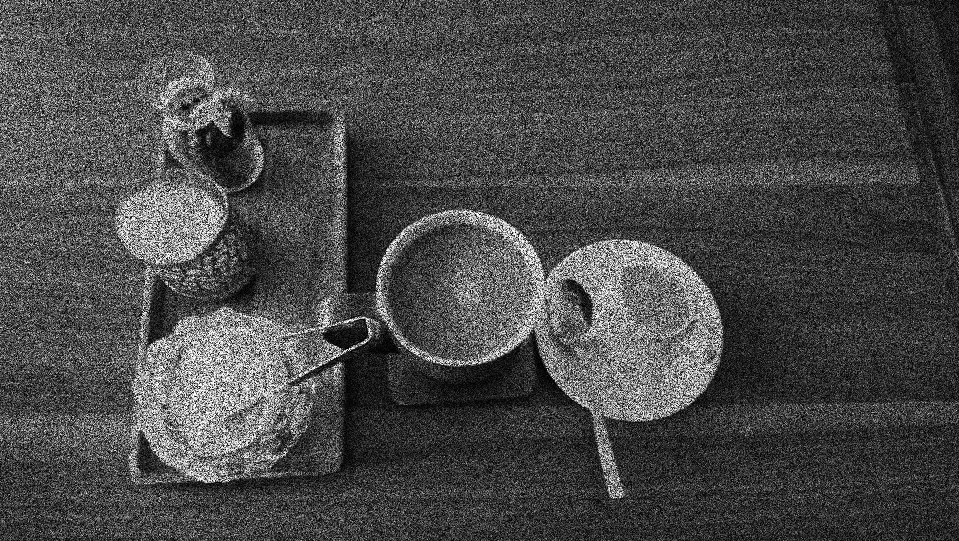

Image with Gaussian Noise after applying Harmonic Mean Filter


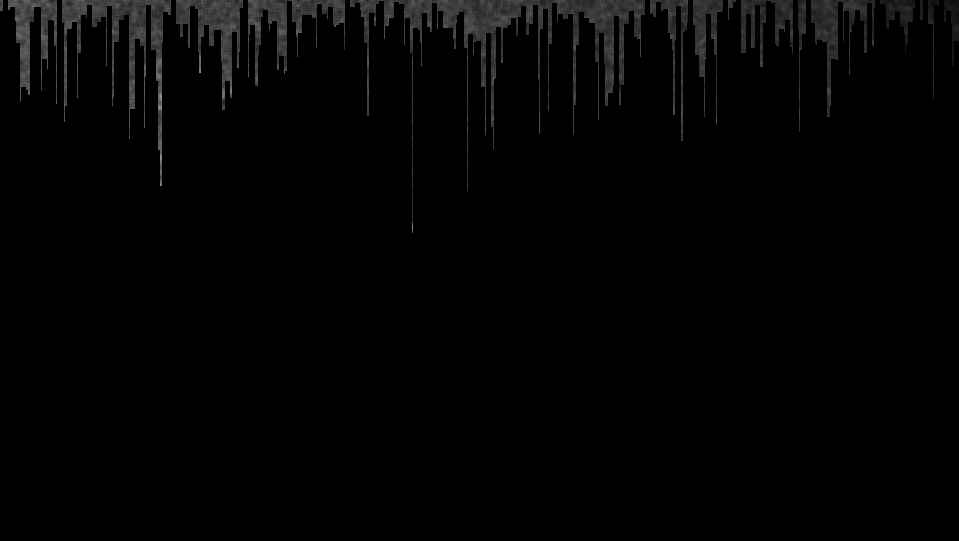

In [ ]:
img = cv2.imread("/content/drive/MyDrive/ipphotos/Assignment10/gusnoisecolor.png", cv2.IMREAD_GRAYSCALE).astype(float)
rows, cols = img.shape[:2]
ksize = 5

geomean2 = np.uint8(np.exp(cv2.boxFilter(np.log(img), -1, (ksize, ksize))))

print("Input Image with Gaussian Noise")
cv2_imshow(img)
print("Image with Gaussian Noise after applying Harmonic Mean Filter")
cv2_imshow(geomean2)

##Harmonic_Mean_Filter_For_Salt_Noise

Input Image with Salt Noise


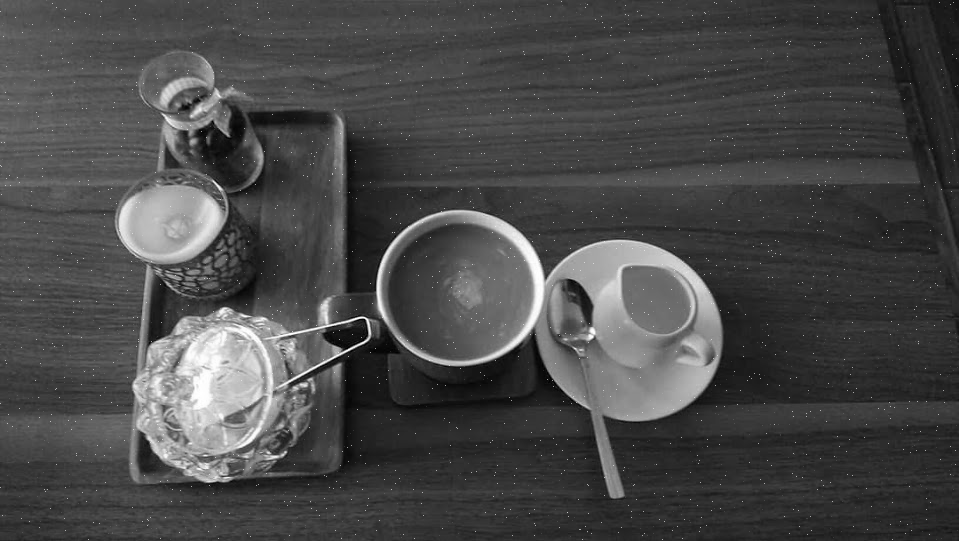

Image with Salt Noise after applying Harmonic Mean Filter


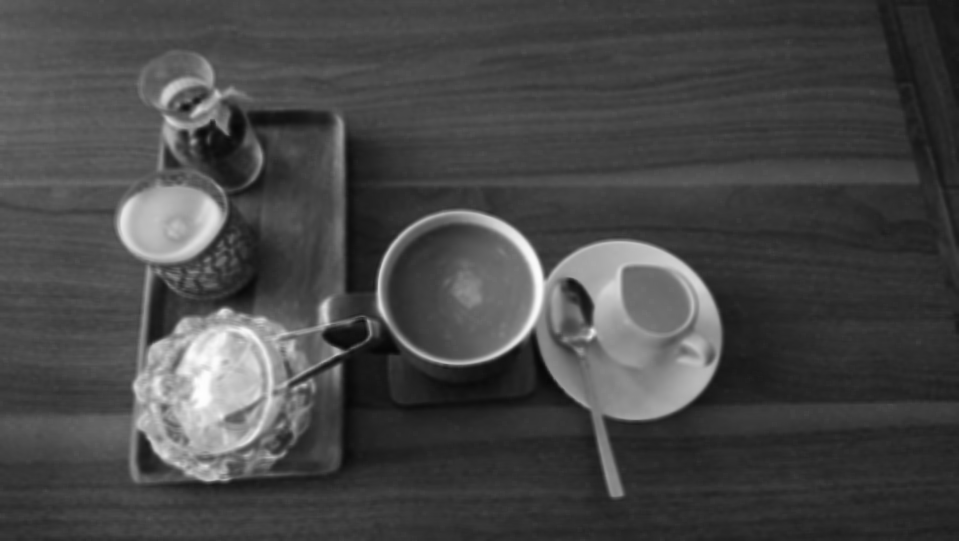

In [ ]:
input5 = cv2.imread("/content/drive/MyDrive/ipphotos/Assignment10/saltnoise.png", cv2.IMREAD_GRAYSCALE).astype(float)
rows, cols = input5.shape[:2]
ksize = 5

output8 = np.uint8(np.exp(cv2.boxFilter(np.log(input5), -1, (ksize, ksize))))

print("Input Image with Salt Noise")
cv2_imshow(input5)
print("Image with Salt Noise after applying Harmonic Mean Filter")
cv2_imshow(output8)